In [84]:

# Import Necessary Libraries:
! pip install facets-overview
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix
from graphviz import Source
from sklearn import tree
import pandas as pd
import random
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from IPython.core.display import display, HTML
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import sklearn.metrics as metrics
import pickle
import time
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\wrksy\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\wrksy\AppData\Local\Temp\ipykernel_14284\3887428533.py:14: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [6]:

# Reading and Combining CSV Files:

# Multiple CSV files representing different days of traffic data are read in chunks to avoid memory issues. The chunks are combined into a single DataFrame and saved as a new file combined_dataset.csv.

# List of dataset files
csv_files = [
    "Monday-WorkingHours.pcap_ISCX.csv",
    "Tuesday-WorkingHours.pcap_ISCX.csv",
    "Wednesday-workingHours.pcap_ISCX.csv",
    "Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv",
    "Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv",
    "Friday-WorkingHours-Morning.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv",
    "Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
]

# Step 1: Load the dataset in chunks to avoid memory issues
chunk_size = 50000  # Adjust based on available memory
combined_chunks = []  # Store chunks temporarily

for file in csv_files:
    print(f"Processing {file}...")
    # Process in chunks to handle large files efficiently
    for chunk in pd.read_csv(file, chunksize=chunk_size, encoding='ISO-8859-1'):
        combined_chunks.append(chunk)

Processing Monday-WorkingHours.pcap_ISCX.csv...
Processing Tuesday-WorkingHours.pcap_ISCX.csv...
Processing Wednesday-workingHours.pcap_ISCX.csv...
Processing Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv...
Processing Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv...
Processing Friday-WorkingHours-Morning.pcap_ISCX.csv...
Processing Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv...
Processing Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv...


In [7]:
# Concatenate all chunks into a single DataFrame
combined_df = pd.concat(combined_chunks, ignore_index=True)

# Save the combined dataset to a new CSV file
combined_df.to_csv('combined_dataset.csv', index=False)

print("Combined dataset created successfully!")

# Step 2: Data Cleaning and Preprocessing
# Strip any whitespace in column names
combined_df.columns = combined_df.columns.str.strip()

Combined dataset created successfully!


In [8]:
combined_df.shape

(2830743, 79)

In [9]:
combined_df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [10]:
print(combined_df.columns)

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [11]:
combined_df.columns = combined_df.columns.str.strip()
combined_df = combined_df.drop(columns=['Fwd Header Length.1'])
combined_df.shape

(2830743, 78)

In [12]:
combined_df['Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack ï¿½ Brute Force', 'Web Attack ï¿½ XSS',
       'Web Attack ï¿½ Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [13]:
combined_df['Label'].value_counts()

Label
BENIGN                          2273097
DoS Hulk                         231073
PortScan                         158930
DDoS                             128027
DoS GoldenEye                     10293
FTP-Patator                        7938
SSH-Patator                        5897
DoS slowloris                      5796
DoS Slowhttptest                   5499
Bot                                1966
Web Attack ï¿½ Brute Force         1507
Web Attack ï¿½ XSS                  652
Infiltration                         36
Web Attack ï¿½ Sql Injection         21
Heartbleed                           11
Name: count, dtype: int64

In [14]:
print(combined_df.columns)

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [15]:
# The "Flow Bytes/s" and "Flow Packets/s" columns have non-numerical values, replace them.
combined_df.replace('Infinity', -1, inplace=True)
combined_df[["Flow Bytes/s", "Flow Packets/s"]] = combined_df[["Flow Bytes/s", "Flow Packets/s"]].apply(pd.to_numeric)

In [16]:
# Replace the NaN values and infinity values with -1.
combined_df.replace([np.inf, -np.inf, np.nan], -1, inplace=True)

In [17]:
# Convert string characters to numbers, use LabelEncoder, not OneHotEncoder.
string_features = list(combined_df.select_dtypes(include=['object']).columns)
string_features.remove('Label')
string_features

[]

In [18]:
le = preprocessing.LabelEncoder()
combined_df[string_features] = combined_df[string_features].apply(lambda col: le.fit_transform(col))

In [19]:
### Undersampling against unbalance, I use undersampling to correct class imbalances: we remove most of the "BENIGN" records.
benign_total = len(combined_df[combined_df['Label'] == "BENIGN"])
benign_total

2273097

In [20]:
attack_total = len(combined_df[combined_df['Label'] != "BENIGN"])
attack_total

557646

In [21]:
combined_df.to_csv("web_attacks_unbalanced.csv", index=False)
combined_df['Label'].value_counts()

Label
BENIGN                          2273097
DoS Hulk                         231073
PortScan                         158930
DDoS                             128027
DoS GoldenEye                     10293
FTP-Patator                        7938
SSH-Patator                        5897
DoS slowloris                      5796
DoS Slowhttptest                   5499
Bot                                1966
Web Attack ï¿½ Brute Force         1507
Web Attack ï¿½ XSS                  652
Infiltration                         36
Web Attack ï¿½ Sql Injection         21
Heartbleed                           11
Name: count, dtype: int64

In [22]:
## Сalculate the probability of copying a "BENIGN" record. The enlargement multiplier is used to get exactly 70% benign data.
enlargement = 1.1
benign_included_max = attack_total / 30 * 70
benign_inc_probability = (benign_included_max / benign_total) * enlargement
print(benign_included_max, benign_inc_probability)

1301174.0 0.6296657819705891


In [23]:
# Copy records from df to df_balanced, save dataset **web_attacks_balanced.csv**.
indexes = []
benign_included_count = 0
for index, row in combined_df.iterrows():
    if (row['Label'] != "BENIGN"):
        indexes.append(index)
    else:
        # Copying with benign_inc_probability
        if random.random() > benign_inc_probability: continue
        # Have we achieved 70% (5087 records)?
        if benign_included_count > benign_included_max: continue
        benign_included_count += 1
        indexes.append(index)
df_balanced = combined_df.loc[indexes]

In [24]:
df_balanced['Label'].value_counts()

Label
BENIGN                          1301175
DoS Hulk                         231073
PortScan                         158930
DDoS                             128027
DoS GoldenEye                     10293
FTP-Patator                        7938
SSH-Patator                        5897
DoS slowloris                      5796
DoS Slowhttptest                   5499
Bot                                1966
Web Attack ï¿½ Brute Force         1507
Web Attack ï¿½ XSS                  652
Infiltration                         36
Web Attack ï¿½ Sql Injection         21
Heartbleed                           11
Name: count, dtype: int64

In [25]:
# If necessary, we can keep a single class of attack for experiments.
df_balanced = df_balanced[df_balanced['Label'] != "Web Attack – Brute Force"]
df_balanced = df_balanced[df_balanced['Label'] != "Web Attack – Sql Injection"]
df_balanced['Label'].value_counts()

Label
BENIGN                          1301175
DoS Hulk                         231073
PortScan                         158930
DDoS                             128027
DoS GoldenEye                     10293
FTP-Patator                        7938
SSH-Patator                        5897
DoS slowloris                      5796
DoS Slowhttptest                   5499
Bot                                1966
Web Attack ï¿½ Brute Force         1507
Web Attack ï¿½ XSS                  652
Infiltration                         36
Web Attack ï¿½ Sql Injection         21
Heartbleed                           11
Name: count, dtype: int64

In [26]:
df_balanced.to_csv("web_attacks_balanced.csv", index=False)

In [27]:
### Preparing data for training
chunk_size = 50000  

# Initialize an empty list to store the chunks
chunks = []

# Read the CSV file in chunks
for chunk in pd.read_csv('web_attacks_balanced.csv', chunksize=chunk_size, encoding='ISO-8859-1'):
    chunks.append(chunk)

# Concatenate the chunks into a single DataFrame
df = pd.concat(chunks, ignore_index=True)

# Check the shape of the combined DataFrame
print("Data loaded successfully with shape:", df.shape)


Data loaded successfully with shape: (1858821, 78)


In [28]:
# The Label column is encoded as follows: "BENIGN" = 0, attack = 1.
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [29]:
excluded = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp']
df = df.drop(columns=excluded, errors='ignore')

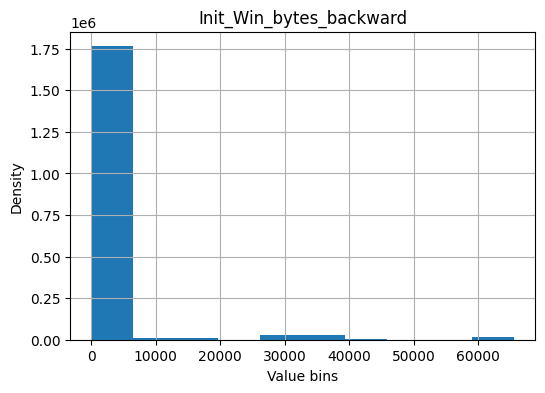

In [30]:
if 'Init_Win_bytes_backward' in df.columns:
    df['Init_Win_bytes_backward'].hist(figsize=(6,4), bins=10);
    plt.title("Init_Win_bytes_backward")
    plt.xlabel("Value bins")
    plt.ylabel("Density")
    plt.savefig('Init_Win_bytes_backward.png', dpi=300)

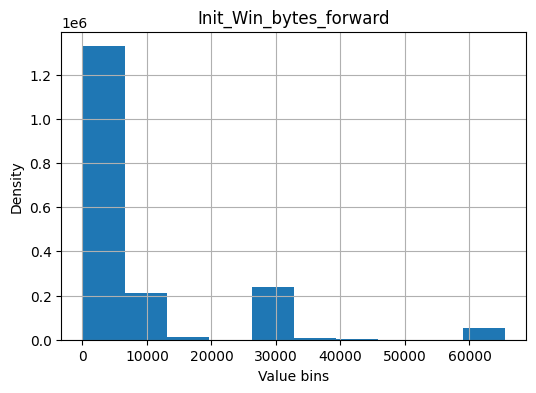

In [31]:
if 'Init_Win_bytes_forward' in df.columns:
    df['Init_Win_bytes_forward'].hist(figsize=(6,4), bins=10);
    plt.title("Init_Win_bytes_forward")
    plt.xlabel("Value bins")
    plt.ylabel("Density")
    plt.savefig('Init_Win_bytes_forward.png', dpi=300)

In [32]:
excluded2 = ['Init_Win_bytes_backward', 'Init_Win_bytes_forward']
df = df.drop(columns=excluded2, errors='ignore')

In [33]:
y = df['Label'].values
X = df.drop(columns=['Label'])
print(X.shape, y.shape)

(1858821, 74) (1858821,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 910469, 1: 390705}

In [35]:
decision_tree = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
decision_tree = decision_tree.fit(X_train, y_train)
cross_val_score(decision_tree, X_train, y_train, cv=10)

array([0.93810234, 0.93619638, 0.93655759, 0.93698028, 0.93789436,
       0.93751777, 0.93684146, 0.93877818, 0.93766379, 0.9366109 ])

In [36]:
from sklearn.tree import export_text
r = export_text(decision_tree, feature_names=X_train.columns.to_list())
print(r)

|--- Bwd Packet Length Std <= 1495.65
|   |--- Average Packet Size <= 7.69
|   |   |--- Bwd Header Length <= 22.00
|   |   |   |--- Max Packet Length <= 4.00
|   |   |   |   |--- class: 0
|   |   |   |--- Max Packet Length >  4.00
|   |   |   |   |--- class: 1
|   |   |--- Bwd Header Length >  22.00
|   |   |   |--- class: 0
|   |--- Average Packet Size >  7.69
|   |   |--- class: 0
|--- Bwd Packet Length Std >  1495.65
|   |--- class: 1



In [37]:
# Export decision tree as a dot file format, and render using graphviz
dot_data = tree.export_graphviz(
    decision_tree, 
    out_file=None,  # No need to write to a file
    feature_names=X.columns,  # Ensure X is a DataFrame with column names
    filled=True,  # Option to fill colors in nodes based on class predictions
    rounded=True,  # Rounded corners for aesthetics
    special_characters=True  # Use special characters like >, ≤
)

# Create and display the graph
graph = Source(dot_data)
graph.render("decision_tree")  # Optionally save as a PDF or image
graph.view()  # This will open the tree visualization


'decision_tree.pdf'

In [38]:
## Analyze the confusion matrix. Which classes are confidently classified by the model?
unique, counts = np.unique(y_test, return_counts=True)
dict(zip(unique, counts))

{0: 390706, 1: 166941}

In [39]:
y_pred = decision_tree.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[388785,   1921],
       [ 32655, 134286]], dtype=int64)

In [44]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(estimator=decision_tree).fit(X_train, y_train)
sfm.estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.43423959, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.15782458,
       0.        , 0.        , 0.        , 0.07803867, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.32989715, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [45]:
sfm.threshold_

0.013513513513513514

In [46]:
X_train_new = sfm.transform(X_train)
print("Original num features: {}, selected num features: {}"
      .format(X_train.shape[1], X_train_new.shape[1]))

Original num features: 74, selected num features: 4


In [47]:
indices = np.argsort(decision_tree.feature_importances_)[::-1]
for idx, i in enumerate(indices[:10]):
    print("{}.\t{} - {}".format(idx, X_train.columns[i], decision_tree.feature_importances_[i]))

0.	Bwd Packet Length Std - 0.4342395919706389
1.	Average Packet Size - 0.3298971506949897
2.	Bwd Header Length - 0.15782458429758411
3.	Max Packet Length - 0.0780386730367873
4.	Bwd IAT Std - 0.0
5.	Fwd IAT Std - 0.0
6.	Fwd IAT Max - 0.0
7.	Fwd IAT Min - 0.0
8.	Bwd IAT Total - 0.0
9.	Bwd IAT Mean - 0.0


In [48]:
rf = RandomForestClassifier(n_estimators=250, random_state=42, oob_score=True)
rf.fit(X_train, y_train)
# Score = mean accuracy on the given test data and labels
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f} \nOut-of-bag Score: {:.2f}'
      .format(rf.score(X_train, y_train), rf.score(X_test, y_test), rf.oob_score_))

R^2 Training Score: 0.99 
R^2 Validation Score: 0.99 
Out-of-bag Score: 0.99


In [49]:
features = X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
webattack_features = []

for index, i in enumerate(indices[:20]):
    webattack_features.append(features[i])
    print('{}.\t#{}\t{:.3f}\t{}'.format(index + 1, i, importances[i], features[i]))

1.	#41	0.088	Packet Length Variance
2.	#51	0.073	Average Packet Size
3.	#12	0.061	Bwd Packet Length Std
4.	#40	0.056	Packet Length Std
5.	#53	0.040	Avg Bwd Segment Size
6.	#11	0.039	Bwd Packet Length Mean
7.	#39	0.035	Packet Length Mean
8.	#38	0.034	Max Packet Length
9.	#3	0.031	Total Length of Fwd Packets
10.	#9	0.031	Bwd Packet Length Max
11.	#61	0.030	Subflow Fwd Bytes
12.	#63	0.027	Subflow Bwd Bytes
13.	#5	0.027	Fwd Packet Length Max
14.	#33	0.027	Fwd Header Length
15.	#34	0.023	Bwd Header Length
16.	#4	0.022	Total Length of Bwd Packets
17.	#52	0.021	Avg Fwd Segment Size
18.	#65	0.017	min_seg_size_forward
19.	#7	0.017	Fwd Packet Length Mean
20.	#10	0.015	Bwd Packet Length Min


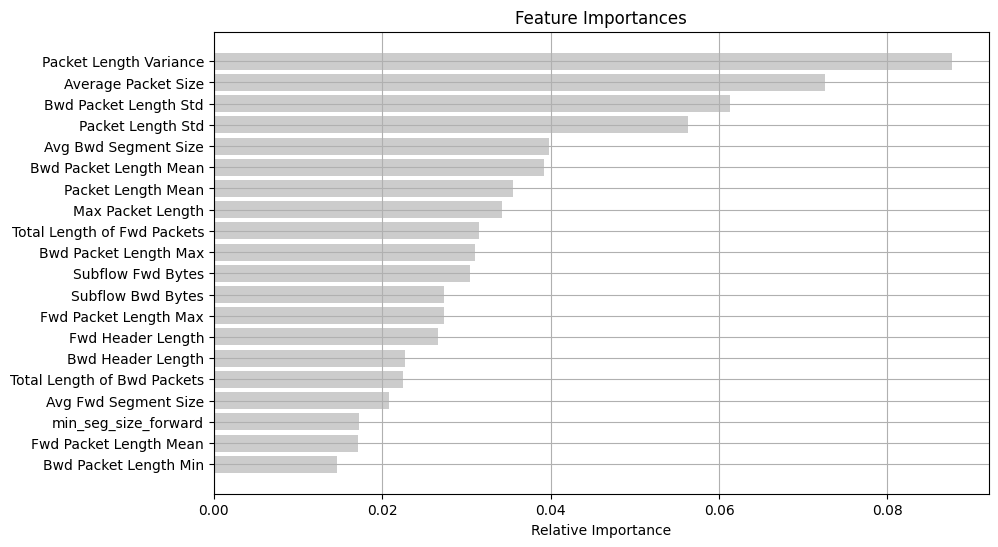

In [50]:
indices = np.argsort(importances)[-20:]
plt.rcParams['figure.figsize'] = (10, 6)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#cccccc', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.grid()
plt.savefig('feature_importances.png', dpi=300, bbox_inches='tight')
plt.show()

In [51]:
y_pred = rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[386159,   4547],
       [  1939, 165002]], dtype=int64)

In [52]:
max_features = 20
webattack_features = webattack_features[:max_features]
webattack_features

['Packet Length Variance',
 'Average Packet Size',
 'Bwd Packet Length Std',
 'Packet Length Std',
 'Avg Bwd Segment Size',
 'Bwd Packet Length Mean',
 'Packet Length Mean',
 'Max Packet Length',
 'Total Length of Fwd Packets',
 'Bwd Packet Length Max',
 'Subflow Fwd Bytes',
 'Subflow Bwd Bytes',
 'Fwd Packet Length Max',
 'Fwd Header Length',
 'Bwd Header Length',
 'Total Length of Bwd Packets',
 'Avg Fwd Segment Size',
 'min_seg_size_forward',
 'Fwd Packet Length Mean',
 'Bwd Packet Length Min']

## Analysis of selected features

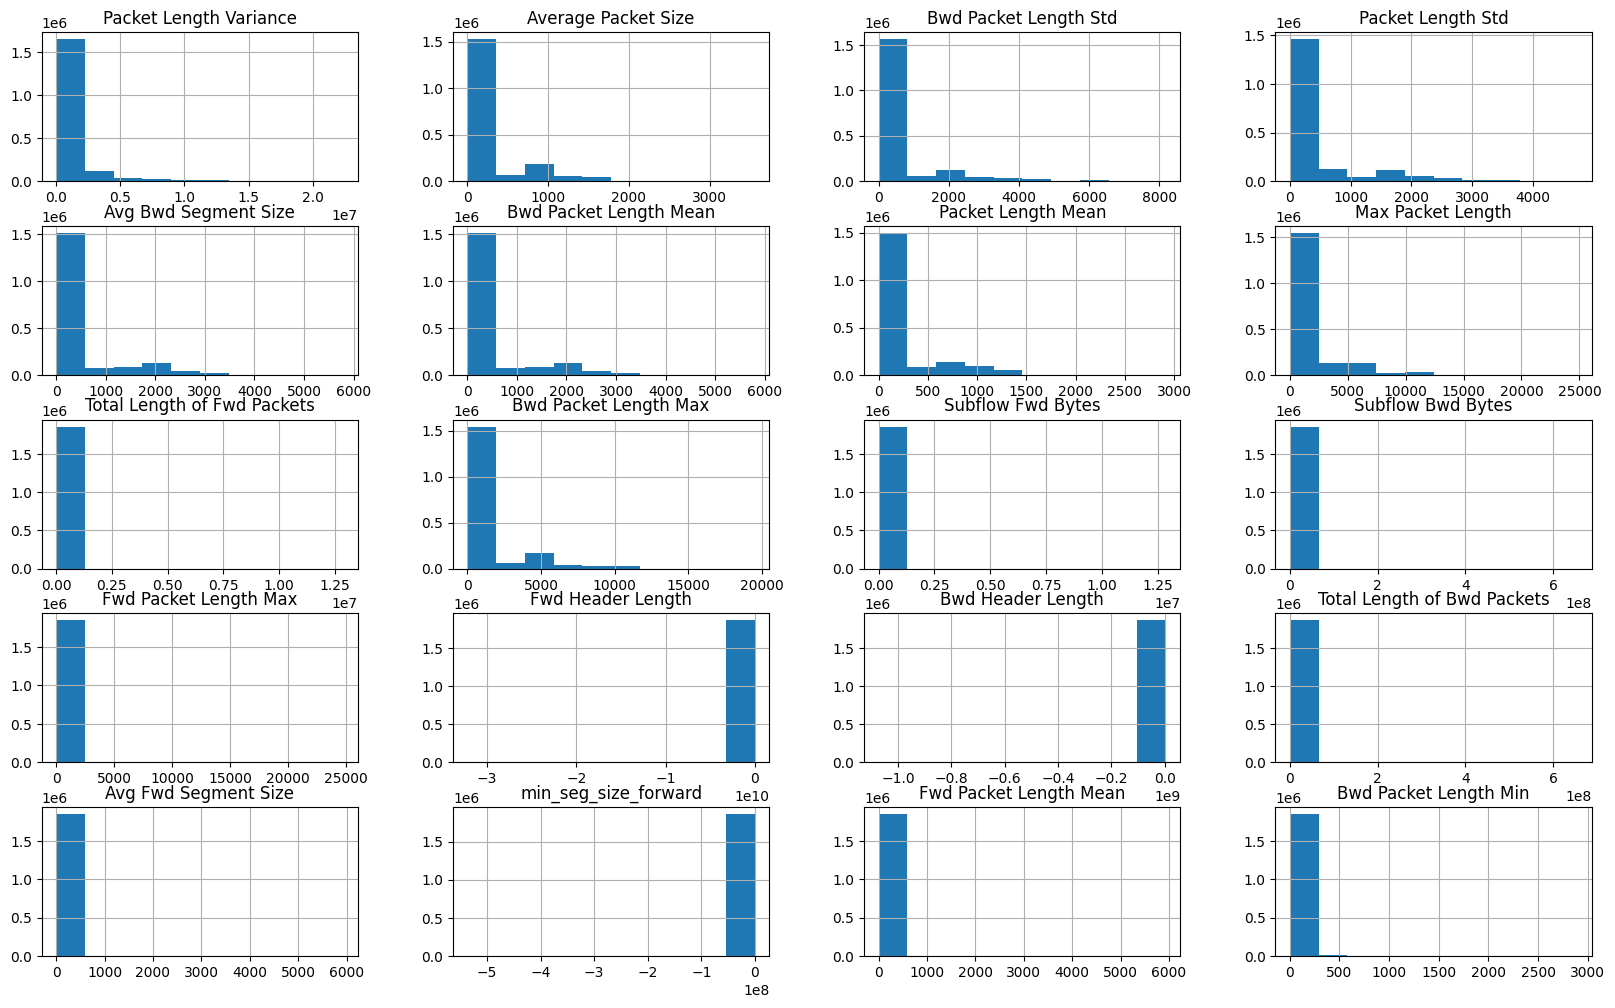

In [53]:
df[webattack_features].hist(figsize=(20,12), bins=10);
plt.savefig('features_hist.png', dpi=300)

In [54]:
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'train + test', 'table': df[webattack_features]}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

C:\Users\wrksy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\facets_overview\base_generic_feature_statistics_generator.py:121: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  flattened = x.ravel()


In [55]:
## Display the facets overview visualization for this data.
HTML_TEMPLATE = """
        <script src="https://cdnjs.cloudflare.com/ajax/libs/webcomponentsjs/1.3.3/webcomponents-lite.js"></script>
        <link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/1.0.0/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

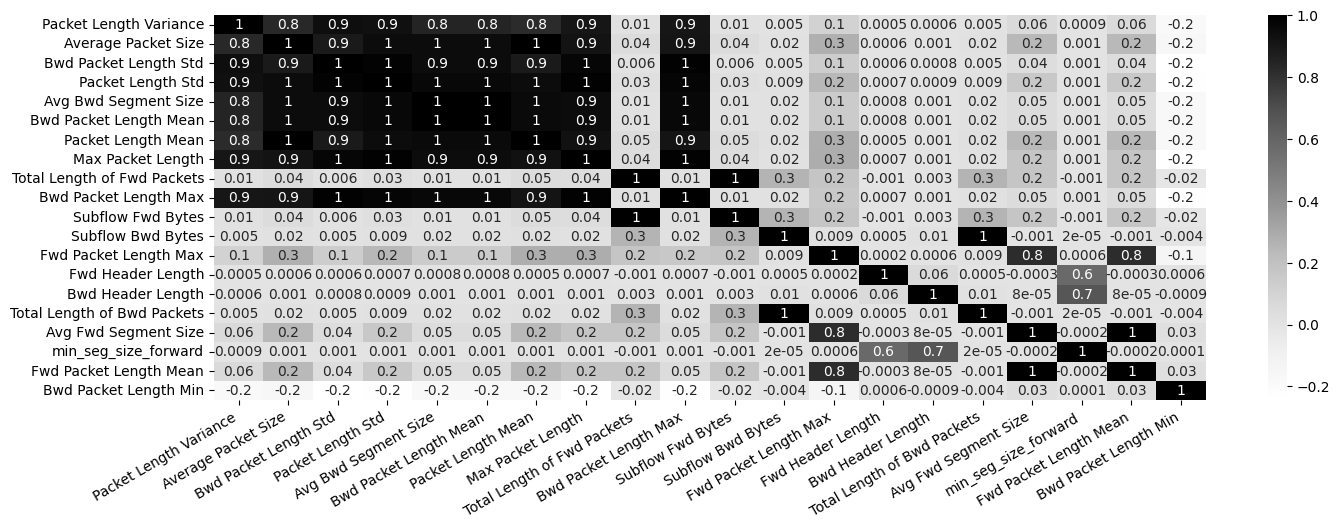

In [56]:
corr_matrix = df[webattack_features].corr()
plt.rcParams['figure.figsize'] = (16, 5)
g = sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap='Greys')
g.set_xticklabels(g.get_xticklabels(), verticalalignment='top', horizontalalignment='right', rotation=30);
plt.savefig('corr_heatmap.png', dpi=300, bbox_inches='tight')

In [57]:
to_be_removed = {'Packet Length Mean', 'Avg Fwd Segment Size', 'Subflow Fwd Bytes',
                 'Fwd Packets/s', 'Fwd IAT Total', 'Fwd IAT Max'}
webattack_features = [item for item in webattack_features if item not in to_be_removed]
webattack_features = webattack_features[:10]
webattack_features

['Packet Length Variance',
 'Average Packet Size',
 'Bwd Packet Length Std',
 'Packet Length Std',
 'Avg Bwd Segment Size',
 'Bwd Packet Length Mean',
 'Max Packet Length',
 'Total Length of Fwd Packets',
 'Bwd Packet Length Max',
 'Subflow Bwd Bytes']

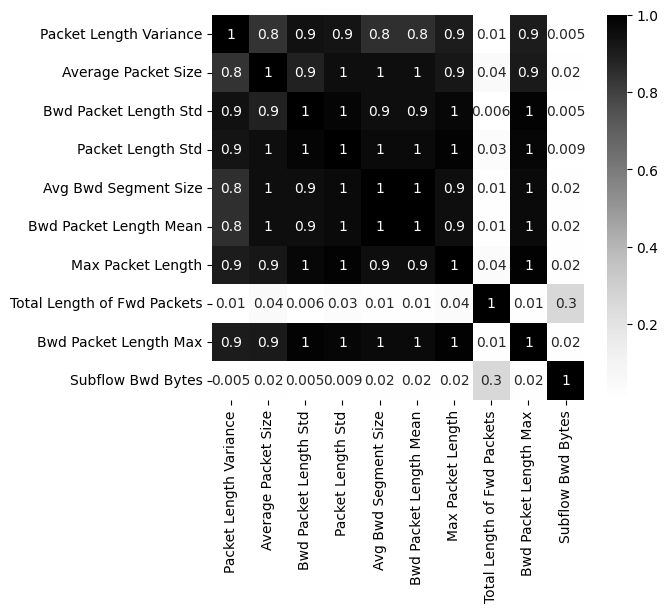

In [58]:
corr_matrix = df[webattack_features].corr()
plt.rcParams['figure.figsize'] = (6, 5)
sns.heatmap(corr_matrix, annot=True, fmt='.1g', cmap='Greys');

## Hyperparameter selection

In [59]:
## Reopen the dataset.
df = pd.read_csv('web_attacks_balanced.csv')
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)
y = df['Label'].values
X = df[webattack_features]
print(X.shape, y.shape)

(1858821, 10) (1858821,)


In [60]:
rfc = RandomForestClassifier(random_state=1)
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

For search of quasi-optimal value of one parameter we fix the others.

In [61]:
# Define parameter grid
parameters = {
    'n_estimators': [10],
    'min_samples_leaf': [3],
    'max_features': [3],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 20, 30, 50]
}

# Define scoring metrics
scoring = ['f1', 'accuracy']  # Should be a list, not a set

# Create GridSearchCV object
gcv = GridSearchCV(rfc, parameters, scoring=scoring, refit='f1', cv=10, return_train_score=True)

# Fit the model (this can take some time depending on your data and parameters)
import time
start_time = time.time()
gcv.fit(X, y)
print(f"Grid search completed in {time.time() - start_time} seconds")

# Get the results
results = gcv.cv_results_


Grid search completed in 4551.26976442337 seconds


In [62]:
cv_results = pd.DataFrame(gcv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_f1,...,split2_train_accuracy,split3_train_accuracy,split4_train_accuracy,split5_train_accuracy,split6_train_accuracy,split7_train_accuracy,split8_train_accuracy,split9_train_accuracy,mean_train_accuracy,std_train_accuracy
0,4.083302,0.083689,0.086174,0.020805,1,3,3,10,"{'max_depth': 1, 'max_features': 3, 'min_sampl...",0.622673,...,0.817694,0.817990,0.832854,0.841950,0.841185,0.834562,0.819327,0.821278,0.827030,0.009327
1,5.885939,0.150538,0.095064,0.020093,2,3,3,10,"{'max_depth': 2, 'max_features': 3, 'min_sampl...",0.708982,...,0.863458,0.865207,0.873364,0.843114,0.843141,0.859046,0.866177,0.868111,0.860482,0.009691
2,7.615344,0.243073,0.093777,0.006473,3,3,3,10,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.613975,...,0.919579,0.918270,0.924893,0.910978,0.910158,0.911001,0.922861,0.909790,0.917647,0.006509
3,9.183258,0.116488,0.098060,0.005477,4,3,3,10,"{'max_depth': 4, 'max_features': 3, 'min_sampl...",0.616406,...,0.933448,0.932324,0.946134,0.925682,0.927364,0.925043,0.925314,0.929724,0.932239,0.007036
4,10.867699,0.206132,0.105467,0.006254,5,3,3,10,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.610130,...,0.944128,0.943297,0.951298,0.933940,0.933893,0.934201,0.934309,0.933505,0.940335,0.006897


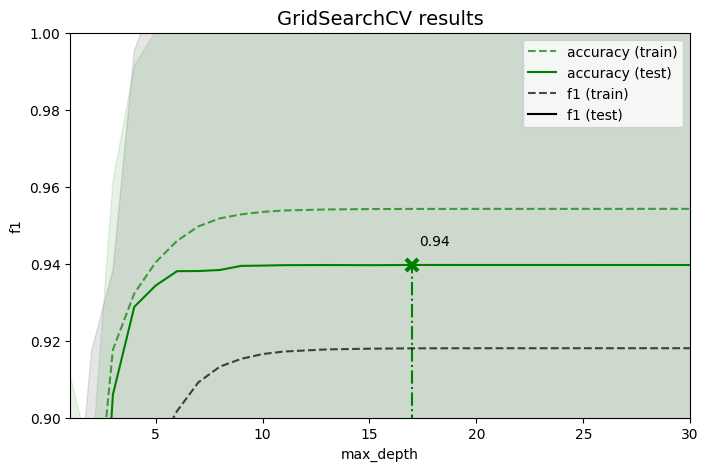

In [63]:
# https://scikit-learn.org/dev/auto_examples/model_selection/plot_multi_metric_evaluation.html
plt.figure(figsize=(8, 5))
plt.title("GridSearchCV results", fontsize=14)

plt.xlabel("max_depth")
plt.ylabel("f1")

ax = plt.gca()
ax.set_xlim(1, 30)
ax.set_ylim(0.9, 1)

X_axis = np.array(results['param_max_depth'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index] + 0.3, best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.savefig('GridSearchCV_results.png', dpi=300)
plt.show()

### Grid search

In [64]:
parameters = {'n_estimators': [30, 50, 70],
              'min_samples_leaf': [3, 5, 7],
              'max_features': [3, 5, 7, 10],
              'max_depth': [10, 17, 23]}

# parameters = {'n_estimators': [250]}

In [65]:
# Use RandomizedSearchCV instead of GridSearchCV
random_search = RandomizedSearchCV(
    rfc, 
    parameters, 
    scoring=scoring, 
    refit='f1', 
    cv=3, 
    return_train_score=True,
    n_iter=10,  
    random_state=42  
)
get_ipython().run_line_magic('time', 'random_search.fit(X, y)')

CPU times: total: 24min 7s
Wall time: 1h 10min 39s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   param_distributions={'max_depth': [10, 17, 23],
                                        'max_features': [3, 5, 7, 10],
                                        'min_samples_leaf': [3, 5, 7],
                                        'n_estimators': [30, 50, 70]},
                   random_state=42, refit='f1', return_train_score=True,
                   scoring=['f1', 'accuracy'])

Let's take a look at the results of the parameter selection.

In [66]:
gcv.best_estimator_

RandomForestClassifier(max_depth=17, max_features=3, min_samples_leaf=3,
                       n_estimators=10, random_state=1)

In [67]:
gcv.best_params_

{'max_depth': 17, 'max_features': 3, 'min_samples_leaf': 3, 'n_estimators': 10}

In [68]:
gcv.best_score_

0.8729033367837247

In [69]:
## Final model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1301174, 10) (1301174,)
(557647, 10) (557647,)


In [70]:
rfc = RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=3, n_estimators=50, random_state=42, oob_score=True)
# rfc = RandomForestClassifier(n_estimators=250, random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=3,
                       n_estimators=50, oob_score=True, random_state=42)

In [71]:
features = X.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

for index, i in enumerate(indices[:10]):
    print('{}.\t#{}\t{:.3f}\t{}'.format(index + 1, i, importances[i], features[i]))

1.	#2	0.422	Bwd Packet Length Std
2.	#1	0.323	Average Packet Size
3.	#6	0.113	Max Packet Length
4.	#9	0.061	Subflow Bwd Bytes
5.	#7	0.037	Total Length of Fwd Packets
6.	#3	0.019	Packet Length Std
7.	#0	0.018	Packet Length Variance
8.	#4	0.004	Avg Bwd Segment Size
9.	#5	0.003	Bwd Packet Length Mean
10.	#8	0.002	Bwd Packet Length Max


In [72]:
y_pred = rfc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[389390,   1316],
       [ 24198, 142743]], dtype=int64)

In [73]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)

Accuracy = 0.9542470415872407
Precision = 0.9908648539834374
Recall = 0.8550505867342354
F1 = 0.9179614147909968


## Model saving

In [74]:
with open('webattack_detection_rf_model.pkl', 'wb') as f:
    pickle.dump(rfc, f)

## Model approbation

Open the previously saved model.

In [75]:
with open('webattack_detection_rf_model.pkl', 'rb') as f:
    rfc = pickle.load(f)
rfc

RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=3,
                       n_estimators=50, oob_score=True, random_state=42)

Reopen the dataset.

In [76]:
df = pd.read_csv('web_attacks_balanced.csv')
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)
y_test = df['Label'].values
X_test = df[webattack_features]
print(X_test.shape, y_test.shape)

(1858821, 10) (1858821,)


In [77]:
X_test.head()

,Packet Length Variance,Average Packet Size,Bwd Packet Length Std,Packet Length Std,Avg Bwd Segment Size,Bwd Packet Length Mean,Max Packet Length,Total Length of Fwd Packets,Bwd Packet Length Max,Subflow Bwd Bytes
0,0.000000,9.000000,0.000000,0.000000,0.0,0.0,6,12,0,0
1,0.000000,9.000000,0.000000,0.000000,0.0,0.0,6,12,0,0
2,0.000000,9.000000,0.000000,0.000000,0.0,0.0,6,12,0,0
3,0.000000,9.000000,0.000000,0.000000,0.0,0.0,6,12,0,0
4,11562.151515,81.636364,119.511506,107.527445,103.5,103.5,233,484,207,414


In [78]:

seconds = time.time()
y_pred = rfc.predict(X_test)
print("Total operation time:", time.time() - seconds, "seconds")

print("Benign records detected (0), attacks detected (1):")
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

Total operation time: 4.299882650375366 seconds
Benign records detected (0), attacks detected (1):


{0: 1377645, 1: 481176}

In [79]:
confusion_matrix(y_test, y_pred)

array([[1296625,    4550],
       [  81020,  476626]], dtype=int64)

In [80]:
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)

Accuracy = 0.9539654436871544
Precision = 0.9905440005320298
Recall = 0.8547106945983652
F1 = 0.9176278515472333


In [81]:
predict = pd.DataFrame({'Predict': rfc.predict(X_test)})
label = pd.DataFrame({'Label': y_test})
result = X_test.join(label).join(predict)

In [82]:
result[result['Predict'] == 1]

,Packet Length Variance,Average Packet Size,Bwd Packet Length Std,Packet Length Std,Avg Bwd Segment Size,Bwd Packet Length Mean,Max Packet Length,Total Length of Fwd Packets,Bwd Packet Length Max,Subflow Bwd Bytes,Label,Predict
475,0.000,7.500000,0.000000,0.000000,0.0,0.0,6,24,0,0,0,1
1006,9.000,6.000000,0.000000,3.000000,0.0,0.0,6,12,0,0,0,1
1013,9.000,6.000000,0.000000,3.000000,0.0,0.0,6,12,0,0,0,1
1014,9.000,6.000000,0.000000,3.000000,0.0,0.0,6,12,0,0,0,1
1305,9.000,6.000000,0.000000,3.000000,0.0,0.0,6,12,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1858816,0.000,7.500000,0.000000,0.000000,0.0,0.0,6,24,0,0,1,1
1858817,3625073.789,1292.555556,2177.344966,1903.962654,1934.5,1934.5,4380,26,4380,11607,1,1
1858818,0.000,7.500000,0.000000,0.000000,0.0,0.0,6,24,0,0,1,1
1858819,3625073.789,1292.555556,2177.344966,1903.962654,1934.5,1934.5,4380,26,4380,11607,1,1


In [83]:
result[410:430]

,Packet Length Variance,Average Packet Size,Bwd Packet Length Std,Packet Length Std,Avg Bwd Segment Size,Bwd Packet Length Mean,Max Packet Length,Total Length of Fwd Packets,Bwd Packet Length Max,Subflow Bwd Bytes,Label,Predict
410,1.015357e+05,186.857143,428.009346,318.646692,218.000000,218.000000,860,436,860,872,0,0
411,1.408333e+03,115.000000,0.000000,37.527767,120.000000,120.000000,120,55,120,120,0,0
412,2.501795e+05,282.555556,678.003253,500.179418,566.875000,566.875000,1430,551,1430,4535,0,0
413,2.048000e+02,15.500000,0.000000,14.310835,6.000000,6.000000,38,50,6,6,0,0
414,4.538433e+05,605.584906,605.642918,673.678953,1038.033333,1038.033333,1430,955,1430,31141,0,0
415,0.000000e+00,9.000000,0.000000,0.000000,0.000000,0.000000,6,12,0,0,0,0
416,7.680000e+01,50.500000,0.000000,8.763561,50.000000,50.000000,50,68,50,100,0,0
417,1.333049e+06,967.986486,1016.025423,1154.577409,1809.153846,1809.153846,4380,1074,4380,70557,0,0
418,0.000000e+00,9.000000,0.000000,0.000000,0.000000,0.000000,6,12,0,0,0,0
419,1.562500e+02,16.333333,0.000000,12.500000,0.000000,0.000000,31,43,0,0,0,0


In [ ]:

# Import necessary libraries for ANN
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [85]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the ANN model architecture
model = Sequential()

In [86]:
# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))


C:\Users\wrksy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [87]:
# Second hidden layer
model.add(Dense(units=32, activation='relu'))

In [88]:
# Output layer
model.add(Dense(units=1, activation='sigmoid'))

In [89]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [95]:
# Train the model and save training history
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot loss and accuracy over epochs
plt.figure(figsize=(12, 5))

Epoch 1/10
32530/32530 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - accuracy: 0.9047 - loss: 0.2059 - val_accuracy: 0.9329 - val_loss: 0.1925
Epoch 2/10
32530/32530 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.9161 - loss: 0.1925 - val_accuracy: 0.9230 - val_loss: 0.1769
Epoch 3/10
32530/32530 ━━━━━━━━━━━━━━━━━━━━ 31s 959us/step - accuracy: 0.9199 - loss: 0.1880 - val_accuracy: 0.9128 - val_loss: 0.1810
Epoch 4/10
32530/32530 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - accuracy: 0.9184 - loss: 0.1871 - val_accuracy: 0.9235 - val_loss: 0.1761
Epoch 5/10
32530/32530 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.9196 - loss: 0.1870 - val_accuracy: 0.9222 - val_loss: 0.1766
Epoch 6/10
32530/32530 ━━━━━━━━━━━━━━━━━━━━ 40s 1ms/step - accuracy: 0.9174 - loss: 0.1872 - val_accuracy: 0.9228 - val_loss: 0.1830
Epoch 7/10
32530/32530 ━━━━━━━━━━━━━━━━━━━━ 32s 974us/step - accuracy: 0.9199 - loss: 0.1843 - val_accuracy: 0.9184 - val_loss: 0.1774
Epoch 8/10
32530/32530 ━━━━━━━━━━━━━━━━━━━━ 32s 972us/step - accu

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

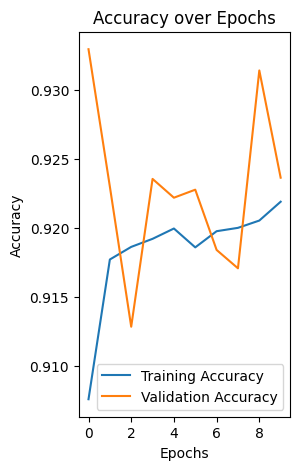

In [96]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

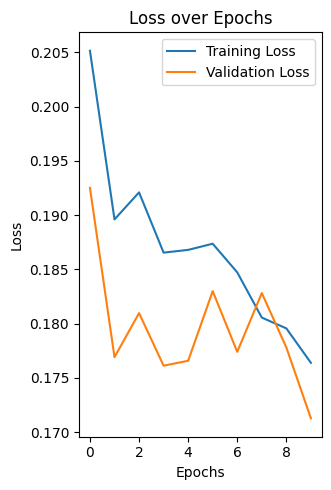

In [97]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [98]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

58089/58089 ━━━━━━━━━━━━━━━━━━━━ 42s 725us/step


Accuracy: 0.9239254344554962
Precision: 0.8935027709132575
Recall: 0.8474229170477328
F1 Score: 0.8698530095266319


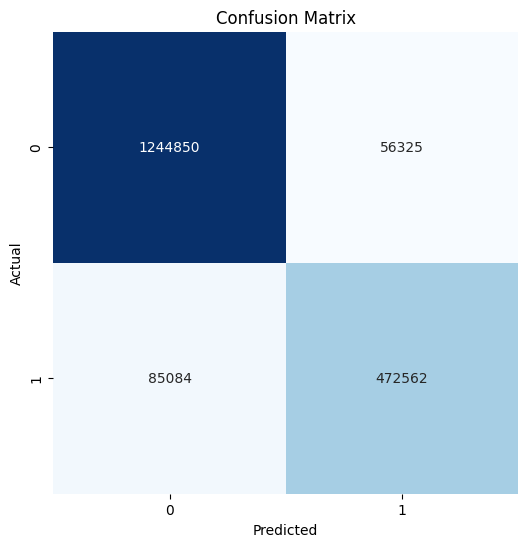

In [99]:
# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
